In [1]:
import numpy as np
import methods
import oracles
import plot_trajectory_2d
import matplotlib.pyplot as plt

## 2.2

Задайте две-три двумерные квадратичные функции с разными числами обусловленности. Запустите на них GD с различными стратегиями выбора шага, изобразите на графиках траектории методов и линии уровня функции. Для рисования линий уровня воспользуйтесь
функцией plot_trajectory, а для траекторий методов – функцией plot_levels из файла
plot_trajectory_2d.

In [14]:
S = lambda phi: np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
S_2 = S(2)

In [34]:
k = 10

In [35]:
A = np.diag([1, k])
b = np.random.random(2)

In [36]:
mat_10 = S_2.dot(A).dot(S_2.T)

In [53]:
x_0 = np.array([10.0, 1.5])

iter count =  301


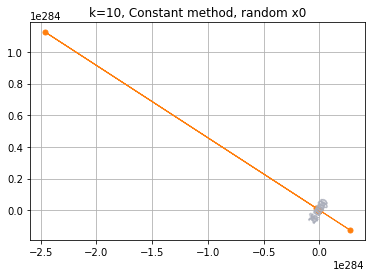

In [113]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Constant"})
m.run(300)
plt.title("k=10, Constant method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  44


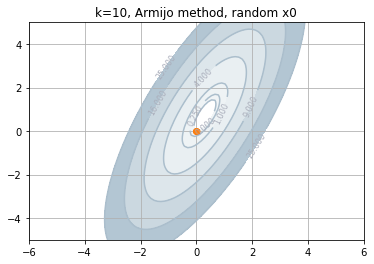

In [114]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Armijo"})
m.run(300)
plt.title("k=10, Armijo method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  44


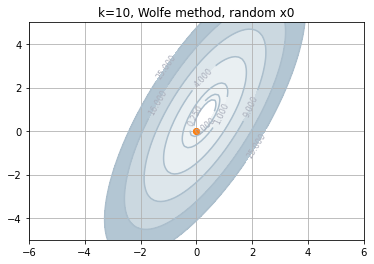

In [115]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Wolfe"})
m.run()
plt.title("k=10, Wolfe method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

### Как зависит поведение методов от начальной точки?

In [59]:
m.hist["x_star"]

array([0.30982475, 0.72493232])

In [66]:
x_0 = np.asarray([0.3, 0.7])

iter count =  301


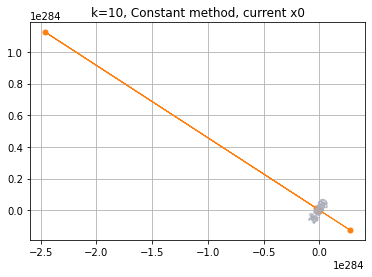

In [116]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Constant"})
m.run(300)
plt.title("k=10, Constant method, current x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  44


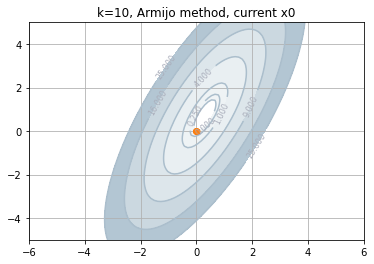

In [117]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Armijo"})
m.run(300)
plt.title("k=10, Armijo method, current x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  44


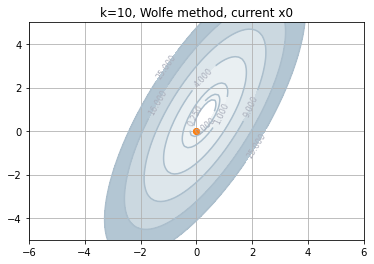

In [118]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Wolfe"})
m.run()
plt.title("k=10, Wolfe method, current x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

Вывод: от начальной точки вообще не зависит

### Как зависит поведение методов от числа обусловленности?

In [70]:
k = 100
A = np.diag([1, k])
mat_100 = S_2.dot(A).dot(S_2.T)

iter count =  301


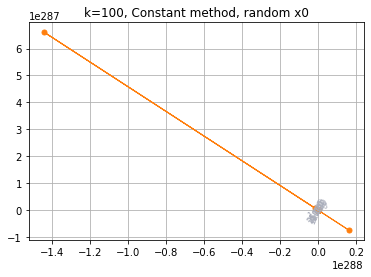

In [119]:
oracle = oracles.QuadraticOracle(mat_100, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Constant", "c": 0.1})
m.run(300)
plt.title("k=100, Constant method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  298


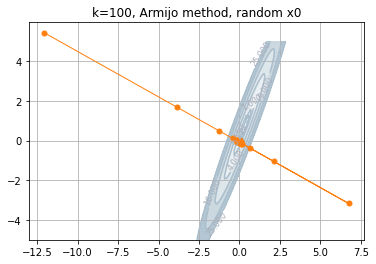

In [120]:
oracle = oracles.QuadraticOracle(mat_100, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo"})
m.run(300)
plt.title("k=100, Armijo method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  4


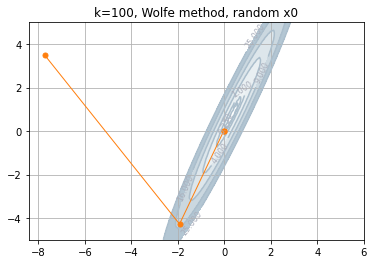

In [121]:
oracle = oracles.QuadraticOracle(mat_100, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe"})
m.run()
plt.title("k=100, Wolfe method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

 Вывод: от числа обусловленности, можно видеть, кол-во итераций зависит как-то линейно
 
 Согласуется с выведенной формулой $$N = O(\kappa * log(\frac{1}{\varepsilon}))$$

### Как зависит поведение методов от стратегии выбора длины шага?

iter count =  109


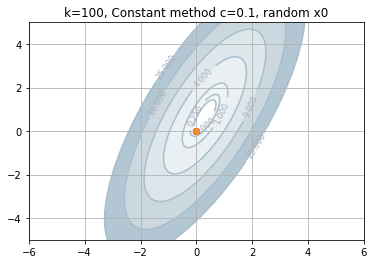

In [122]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Constant", "c": 0.1})
m.run(300)
plt.title("k=100, Constant method c=0.1, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  36


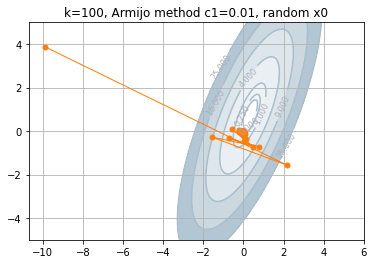

In [123]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo", "c1": 1e-2})
m.run(300)
plt.title("k=100, Armijo method c1=0.01, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  3


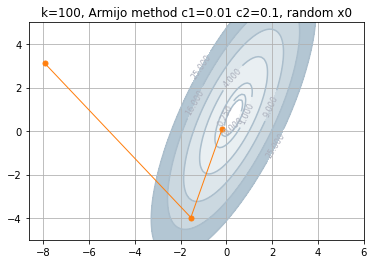

In [124]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe", "c1": 1e-2, "c2": 0.1})
m.run()
plt.title("k=100, Armijo method c1=0.01 c2=0.1, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

Вывод: от выбора длины шага зависит поведение методов, но как так сразу не понятно - нужны более глубокие исследования

## 2.3 

In [84]:
def rand_A(n, k):
    diag = [1]
    for i in range(n - 2):
        diag.append(np.random.random() * (k - 1) + 1)
    diag.append(k)
    return np.diag(diag)

In [102]:
def N_k(n, k_left=10, k_right=31, step=2, samples=100):
    """we sample random function 'samples' times and get average iterations"""
    iters = []
    for k in range(k_left, k_right, step):
        iter_sum = 0
        for j in range(samples):
            A = rand_A(n, k)
            oracle = oracles.QuadraticOracle(A, np.random.random(n))
            m = methods.GradientDescent(oracle, np.random.random(n), line_search_options={"method": "Wolfe"})
            m.run()
            iter_sum += len(m.hist["func"])
        iters.append([k, int(iter_sum / samples)])
    
    iters = np.array(iters)
    x = iters[:, 0]
    y = iters[:, 1]
    plt.plot(x, y)
    plt.xlabel("k")
    plt.ylabel("itetations")
    plt.title(f"Dimension = {n}")
    plt.show()
    
    return iters

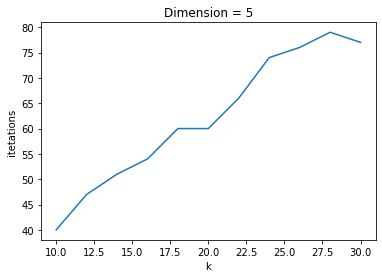

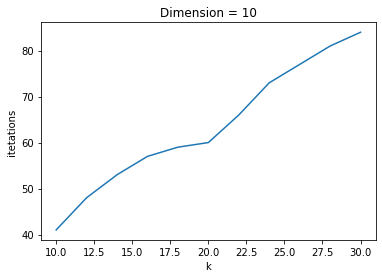

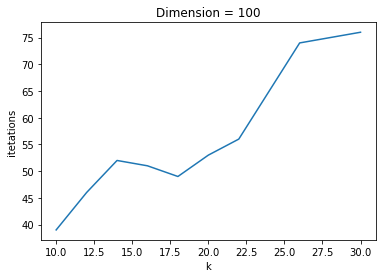

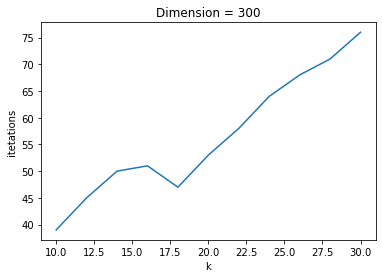

In [147]:
N_n_k = []
dims = [5, 10, 100, 300]
for i in dims:
    N_n_k.append([i, N_k(i)])

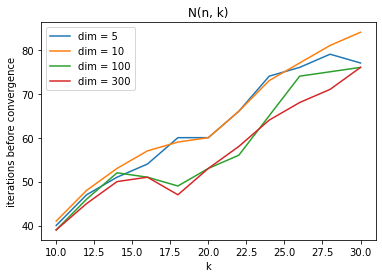

In [160]:
for k, N in N_n_k:
    plt.plot(N[:, 0], N[:, 1], label=f"dim = {k}")
plt.legend()
plt.xlabel("k")
plt.ylabel("iterations before convergence")
plt.title("N(n, k)")
plt.show()

Вывод: от размерности не видно, что зависит, да и n в формуле не фигурирует, могу лишь предполижить, что при больших размерностях мы можем столкнуться с проклятием размерности и это окажет какое-то влияние на $\frac{1}{\varepsilon}$, когда мы нормы вычисляем

От числа обусловленности зависит линейно как мы еще видели это в пункте 2.2, с теорией хорошо согласуется

## 2.4

In [129]:
from sklearn.datasets import load_svmlight_file

In [131]:
def find_iters(m, iters):
    m.run(iters)
    while len(m.hist["func"])>iters:
        iters *= 2
        m.run(iters)
        
    return len(m.hist["func"])

In [134]:
def datasets(file_path, n_features, run_iters=100):
    a = load_svmlight_file(file_path, n_features = n_features)
    oracle = oracles.create_log_reg_oracle(a[0], a[1], 0.5)
    
    methods_conv = {}
    
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Armijo"})
    iters = find_iters(m, run_iters)
    print(f"Armijo method iters = {iters}")
    methods_conv["Armijo"] = iters
    
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Constant"})    
    iters = find_iters(m, run_iters)
    print(f"Constant method iters = {iters}")
    methods_conv["Constant"] = iters
    
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Wolfe"})    
    iters = find_iters(m, run_iters)
    print(f"Wolfe method iters = {iters}")
    methods_conv["Wolfe"] = iters
    
    return [n_features, methods_conv]

In [135]:
methods_info = []
methods_info.append(datasets("./datasets/a9a.txt", 123))
datasets("./datasets/real-sim.bz2", 20958)
datasets("./datasets/gisette_scale.bz2", 5000, 1000)

Armijo method iters = 59
Constant method iters = 59
Wolfe method iters = 59


In [43]:
datasets("./datasets/gisette_scale.bz2", 5000, 250)# Wolfe сошелся за 248 остальные и за 251 не сошлись

/home/slava/Public/Github/made_opt_in_ml/homework_2/oracles.py:80: RuntimeWarning: overflow encountered in exp
  np.log(1 + np.exp(-self.b * (self.matvec_Ax(x))))) + self.regcoef / 2 * x.T.dot(x)


Armijo method iters = 251


/home/slava/Public/Github/made_opt_in_ml/homework_2/oracles.py:83: RuntimeWarning: overflow encountered in exp
  return -1 / self.b.size * self.matvec_ATx(self.b / (1 + np.exp(self.b * self.matvec_Ax(x)))) + self.regcoef * x


Constant method iters = 251
Wolfe method iters = 248


In [45]:
datasets("./datasets/real-sim.bz2", 20958)

Armijo method iters = 18
Constant method iters = 18
Wolfe method iters = 18


In [50]:
datasets("./datasets/gisette_scale.bz2", 5000, 1000) # и за 501 не сошлись

KeyboardInterrupt: 